Tutorial Source: https://developmentseed.org/lonboard/latest/examples/overture-maps/

In [1]:
#import relevant packages
import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import Oranges_9

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap

In [2]:
#create bounding box for region of interest (in this case London)
#to find bounding box for region of interest, go to https://boundingbox.klokantech.com/ and select CSV in the dropdown box
bbox = -0.5633,51.2351,0.3233,51.7304

#New York bbox = -74.02169, 40.696423, -73.891338, 40.831263

In [3]:
#fetches relevant data from AWS S3. May take a while for data to download
table = overturemaps.record_batch_reader("building", bbox).read_all()

#temporarily required as of Lonboard 0.8 to avoid a Lonboard bug
table = table.combine_chunks()

In [4]:
#convert building height to a numpy array and replace null values with 1
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [5]:
#most buildings have low height while others are very tall, thus need to normalise for visualisation
normalizer = LogNorm(1, heights.max(), clip=True)
normalized_heights = normalizer(heights)

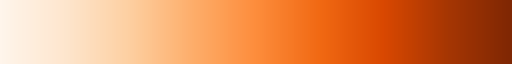

In [6]:
#apply colourmap to heights
Oranges_9.mpl_colormap

In [7]:
#apply values to the colourmap
colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [8]:
#create polygon layers and pass height and colours through it
layer = PolygonLayer(
    # Select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

C:\Users\HP\anaconda3\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:23: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [9]:
view_state = {
    "longitude": -0.118092,
    "latitude": 51.509865,
    "zoom": 12.726630492730596,
    "pitch": 59.80465353190481,
    "bearing": 13.243243243243244,
}
m = Map(layer, view_state=view_state)
m

#New York
#    "longitude": -73.98416810282863,
#    "latitude": 40.72651721370669,

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x000002135E79DB40>
[
…